In [1]:
from sys import path
from dolfin import *
from mshr import *
from Python_module_Quang import *

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import numpy as np
from numpy.core.records import array
from numpy.lib.function_base import append

lab_computer = False
if lab_computer: 
    # path of lab's computer
    sys.path.append(
        '/media/xuanquang/Gaumap Lab data/05_Git_project/FEniCS-RBniCS-examples/20210218_2D_tangential_load/'
    )
else:
    # path of MSI laptop
    sys.path.append(
        '/home/xuanquang/Project_Git/FEniCS-RBniCS-examples/20210218_2D_tangential_load/'
    )

try:
    import file
except:
    print("fail to import file")

try:
    import tangential_load
except:
    print("fail to import tangential_load.py")

format = "png"

from mpl_toolkits import mplot3d


In [2]:
def cal_magnitude(ux, uy):
    u_magnitude = []
    for i in range(len(ux)):
        norm = sqrt((ux[i])**2 + (uy[i])**2)
        u_magnitude.append(norm)
    return u_magnitude

In [3]:
""" main """

# import mesh
mesh = Mesh("data/elastic_block.xml")
V = VectorFunctionSpace(mesh, "Lagrange", 1)

u_FE = load_HDF5(V, mesh, title='u_FE')
u_magnitude = cal_u_magnitude(u=u_FE, mesh=mesh)
u_mag = array(u_magnitude.vector().get_local())

V_mag = FunctionSpace(mesh, "Lagrange", 1)

dof_coordinates = V_mag.tabulate_dof_coordinates()
print(dof_coordinates.shape)
n = V_mag.dim()
d = mesh.geometry().dim()
dof_coordinates.resize((n, d))
x = dof_x = dof_coordinates[:, 0]
y = dof_y = dof_coordinates[:, 1]  

# x, y, ux, uy, nodal_values = file.coordinates_operator(mesh, V, u_FE)
# x, y, ux, uy, nodal_values = file.coordinates_operator(mesh, V_mag, u_magnitude)
# print(x)
# print(y)


# print(type(x))
# print(type(y))
# print(x.shape)
# print(y.shape)
# print(type(ux))
# print(type(uy))

# u_mag = cal_magnitude(ux, uy)
# print(f"len(u_mag): {len(u_mag)}")
# print(type(u_mag.shape))
# print(u_mag.shape)
# print(type(array(x)))
# print(f"x: {x}")
# print(type(y))
# print(f"y: {y}")

# print(y.shape)
# y, y = file.extract_ux_uy(u=y)
# print(type(ux))
# # print(f"ux: {ux}")
# print(type(uy))
# # print(f"uy: {uy}")


(1174, 2)


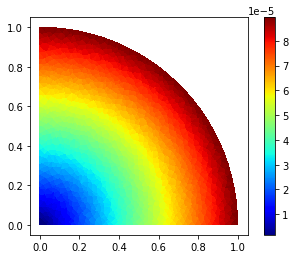

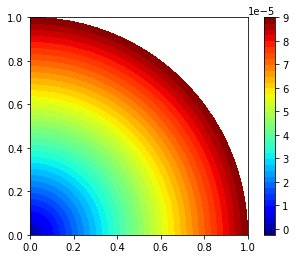

In [4]:
plt.figure()
plot(u_FE, mode="displacement")
plt.jet()
plt.colorbar(plot(u_FE, mode="displacement"))

# plt.figure()
# plot(mesh)

plt.figure()
plt.colorbar(plot(u_magnitude))


# plt.show()

In [5]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
X, Y= x, y
Z = z = u_mag


# Data for a three-dimensional line
# zline = np.linspace(0, 15, 3)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')
# print(len(zline))
# print(zline.shape)
# print(xline)
# print(yline)

print(len(x))
# print(x.shape)

print(len(y))
# print(y.shape)

print(len(u_mag))
# print(u_magnitude.shape)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # ax.plot3D(X, Y, Z, 'gray')
# # ax.contour3D(x, y, u_magnitude, 50, cmap='binary')
# plot = ax.scatter(X, Y, Z, c=z) #, cmap='viridis', linewidth=0.5)
# # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
# #                 cmap='viridis', edgecolor='none')
# # ax.plot_trisurf(x, y, Z, cmap='viridis', edgecolor='none')
# ax.set_title('surface')

# plt.colorbar(plot)


# Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

1174
1174
1174


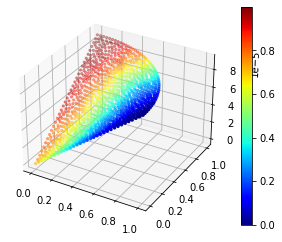

In [17]:
fig = plt.figure()                                                               
ax = fig.add_subplot(111, projection='3d')                             
# first = ax.scatter(x, y, u_FE.vector().get_local(), c='b', marker='.') 
# plt.colorbar(first)

cs = np.arange(len(dof_x)) / len(dof_x)
p = ax.scatter(x, y, u_magnitude.vector().get_local(), c=cs, marker=".") 
fig.colorbar(p)
plt.show()
plt.close()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.recarray'>


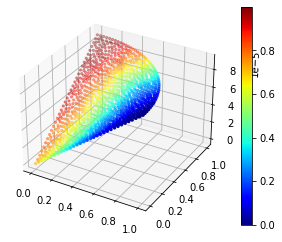

In [18]:
                                                        



fig = plt.figure()                                                          
ax = fig.add_subplot(111, projection='3d')                                       
# p= ax.scatter(dof_x, dof_y, u.vector().get_local(), c='b', marker='.') 
print(type(x))
print(type(y))
print(type(u_mag))
cs = np.arange(len(u_mag)) / len(u_mag)
p = ax.scatter(dof_x, dof_y, u_mag, c=cs, marker=".") 
fig.colorbar(p)
plt.show()

In [ ]:
marker_size=15

x_extract, y_extract = file.extract_ux_uy(u=x)

plt.scatter(x, y, marker_size, c=u_FE.vector().get_local())
plt.title("Point observations")
plt.xlabel("x")
plt.ylabel("y")
cbar= plt.colorbar()
cbar.set_label("elevation (m)", labelpad=+1)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import LogNorm

# x_list = np.array(x)
# y_list = np.array(y)
# z_list = np.array(z)

# N = int(len(z_list)**.5)
# z = z_list.reshape(N, N)
# plt.imshow(z, extent=(np.amin(x_list), np.amax(x_list), np.amin(y_list), np.amax(y_list)), norm=LogNorm(), aspect = 'auto')
# plt.colorbar()
# plt.show()

In [ ]:
from scipy.interpolate import interp2d

x_list = np.array(x)
y_list = np.array(y)
z_list = np.array(z)

# f will be a function with two arguments (x and y coordinates),
# but those can be array_like structures too, in which case the
# result will be a matrix representing the values in the grid 
# specified by those arguments
f = interp2d(x_list,y_list,z_list,kind="linear")

x_coords = np.arange(min(x_list),max(x_list)+1)
y_coords = np.arange(min(y_list),max(y_list)+1)
Z = f(x_coords,y_coords)

fig = plt.imshow(Z,
           extent=[min(x_list),max(x_list),min(y_list),max(y_list)],
           origin="lower")

# Show the positions of the sample points, just to have some reference
fig.axes.set_autoscale_on(False)
# plt.scatter(x_list,y_list,400,facecolors='none')


In [ ]:
# from boxfield import *
# u_box = FEniCSBoxField(u, (nx, ny))